In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# videocard
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
#paths
train_dir = "C:/Users/arene/OneDrive/Desktop/splited_dataset/train"
test_dir  = "C:/Users/arene/OneDrive/Desktop/splited_dataset/test"

# transformations
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data  = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=16, shuffle=False)

print("Classes:", train_data.classes)


Classes: ['Daiatsu_Core', 'Daiatsu_Hijet', 'Daiatsu_Mira', 'FAW_V2', 'FAW_XPV', 'Honda_BRV', 'Honda_City_aspire', 'Honda_Grace', 'Honda_Vezell', 'Honda_city_1994', 'Honda_city_2000', 'Honda_civic_1994', 'Honda_civic_2005', 'Honda_civic_2007', 'Honda_civic_2015', 'Honda_civic_2018', 'KIA_Sportage', 'Suzuki_Every', 'Suzuki_Mehran', 'Suzuki_alto_2007', 'Suzuki_alto_2019', 'Suzuki_alto_japan_2010', 'Suzuki_carry', 'Suzuki_cultus_2018', 'Suzuki_cultus_2019', 'Suzuki_highroof', 'Suzuki_kyber', 'Suzuki_liana', 'Suzuki_margala', 'Suzuki_swift', 'Suzuki_wagonR_2015', 'Toyota HIACE 2000', 'Toyota_Aqua', 'Toyota_Hiace_2012', 'Toyota_Landcruser', 'Toyota_Passo', 'Toyota_Prado', 'Toyota_Vigo', 'Toyota_Vitz', 'Toyota_Vitz_2010', 'Toyota_axio', 'Toyota_corolla_2000', 'Toyota_corolla_2007', 'Toyota_corolla_2011', 'Toyota_corolla_2016', 'Toyota_fortuner', 'Toyota_pirus', 'Toyota_premio']


In [4]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*32*32, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16*32*32)
        x = self.fc1(x)
        return x

num_classes = len(train_data.classes)
model = SimpleCNN(num_classes).to(device)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("Training done!")


Epoch 1/5, Loss: 3.4783
Epoch 2/5, Loss: 2.3573
Epoch 3/5, Loss: 1.2042
Epoch 4/5, Loss: 0.5829
Epoch 5/5, Loss: 0.2821
Training done!


In [7]:
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        print("Predicted:", [train_data.classes[i] for i in predicted[:5]])
        print("Actual   :", [train_data.classes[i] for i in labels[:5]])
        break


Predicted: ['Suzuki_alto_2007', 'Suzuki_cultus_2018', 'Daiatsu_Core', 'Suzuki_Mehran', 'Suzuki_alto_2007']
Actual   : ['Daiatsu_Core', 'Daiatsu_Core', 'Daiatsu_Core', 'Daiatsu_Core', 'Daiatsu_Core']


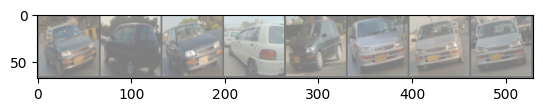

In [8]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize if needed
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))
